# Assessment 2: CNNs for image classification

## 00: Import Necessary Libraries

In [2]:
import torch
import fastai
from fastai.vision.all import *

c:\Users\possa\.conda\envs\Deep_learning\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


## 01: Download and Prepare the Data

In [3]:
path = untar_data(URLs.CIFAR)
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
)
dls = data.dataloaders(path, bs=64)

In [11]:
models.alexnet

<function torchvision.models.alexnet.alexnet(*, weights: Union[torchvision.models.alexnet.AlexNet_Weights, NoneType] = None, progress: bool = True, **kwargs: Any) -> torchvision.models.alexnet.AlexNet>

## 02: Define the Network Structures

In [23]:
# Using pre-defined models in FastAI
alexnet_model = cnn_learner(dls, models.alexnet, metrics=accuracy)
resnet18_model = cnn_learner(dls, models.resnet18, metrics=accuracy)
resnet50_model = cnn_learner(dls, models.resnet50, metrics=accuracy)

c:\Users\possa\.conda\envs\Deep_learning\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
c:\Users\possa\.conda\envs\Deep_learning\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
c:\Users\possa\.conda\envs\Deep_learning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downl

  0%|          | 0.00/233M [00:00<?, ?B/s]

c:\Users\possa\.conda\envs\Deep_learning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\possa\.conda\envs\Deep_learning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\possa/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

## 03: Train the Models

In [24]:
alexnet_model.fit_one_cycle(2)
resnet18_model.fit_one_cycle(2)
resnet50_model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.886958,0.671675,0.766333,13:24
1,0.804830,0.615754,0.789333,06:41


epoch,train_loss,valid_loss,accuracy,time
0,0.425505,0.299083,0.897583,11:07
1,0.330198,0.231266,0.919917,11:47


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

## 04:Compare the Performance

In [25]:
print("AlexNet Accuracy: ", alexnet_model.recorder.final_record[2])
print("ResNet-18 Accuracy: ", resnet18_model.recorder.final_record[2])
# print("ResNet-50 Accuracy: ", resnet50_model.recorder.final_record[2])

AlexNet Accuracy:  0.7893333435058594
ResNet-18 Accuracy:  0.9199166893959045


In [30]:
alexnet_model.recorder.

Recorder

## 05:Test with a Test Image

## Step01: Data exploration

### Exploratory Image analysis

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Check Shape of images:  torch.Size([3, 32, 32]) 4
Preview Images with Label : truck
Show of images unique labels:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


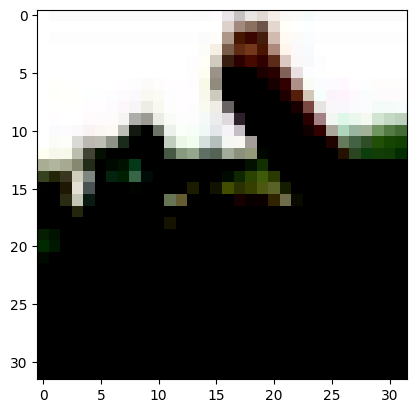

In [5]:
## check shape and labels
img, label = training_data[3]
print("Check Shape of images: ",img.shape,label)

def display_img(img,label):
  print(f"Preview Images with Label : {training_data.classes[label]}")
  plt.imshow(img.permute(1,2,0)) # for visualization following the plt need to change the shapes

#display the first image in the dataset
display_img(*training_data[2])

#Show all labels
classes = training_data.classes
print("Show of images unique labels: ",classes)

### Tranforms to Dataloader

In [6]:
batch_size = 2
## apply the dataloader
torch.manual_seed(0)
trainloader = torch.utils.data.DataLoader(
    training_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory = True
    )

testloader = torch.utils.data.DataLoader(
    testing_data,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0,
    pin_memory = True
    )

### Review the Batch fig and size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([2, 3, 32, 32])


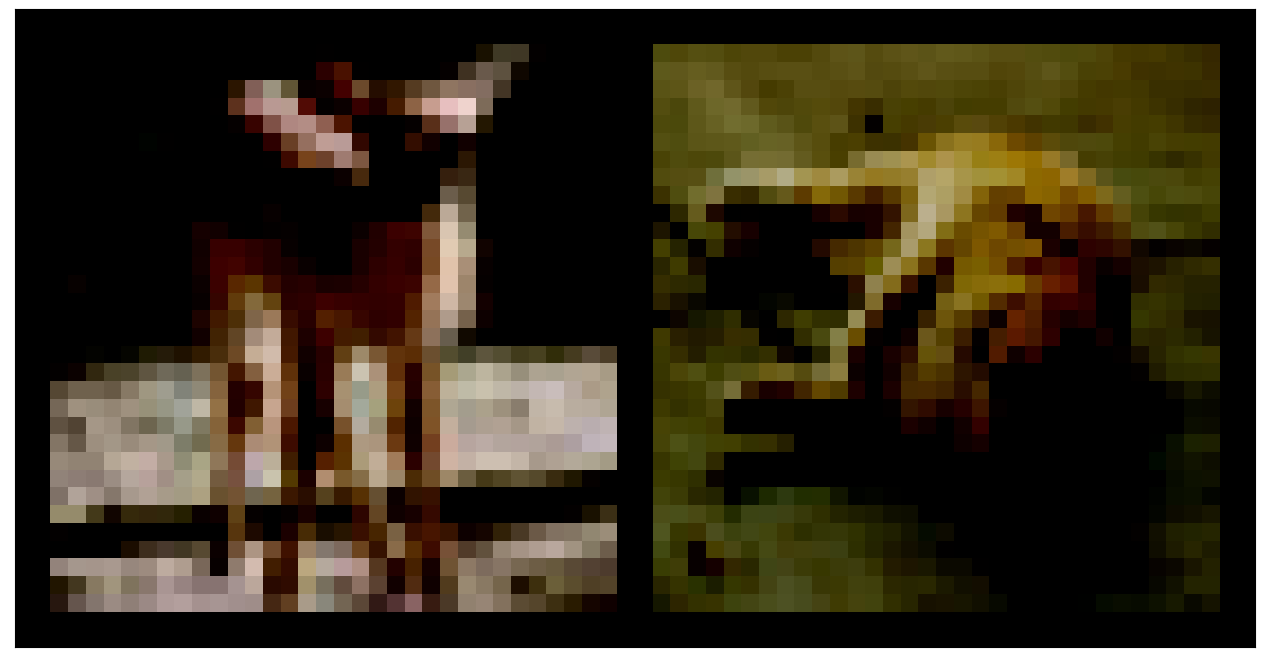

In [6]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break

## show the batch fig
show_batch(trainloader)

## print the size
for batch in trainloader:
    print(batch[0].shape)  # Assuming batch[0] contains the data and batch[1] contains the labels
    break

## Base Model Functions For Image Classification

In [7]:
for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        break
print(labels)

tensor([7, 3], device='cuda:0')


In [8]:
len(labels)

2

In [7]:
# def get_accuracy(pred_arr, original_arr):
#     correct = (pred_arr == original_arr).float().sum()
#     return (correct / original_arr.numel()) * 100  # use numel to get the number of elements in the tensor


def train_network(model, optimizer, criterion, trainloader, testloader, num_epochs):
    # create set to collect the output
    train_loss=[]
    train_accuracy=[]
    test_accuracy=[]
    
    # get the inout and output

    for epoch in range(num_epochs):
        
        correct_train = 0
        total_train = 0
        for data in trainloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            # zero the parameter gradients
            optimizer.zero_grad()
        
            #forward feed
            output_train = model(inputs)
            _, predicted = torch.max(output_train.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
            #calculate the loss
            loss = criterion(output_train, labels)
            #backward propagation: calculate gradients
            loss.backward()
            #update the weights
            optimizer.step()
            
        # collect history data
        train_loss.append(loss.item())
        train_accuracy.append((100 * correct_train / total_train))

        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs_test = model(images)
                _, predicted = torch.max(outputs_test.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
                
            # print(output_test,y_test)
            test_accuracy.append((100 * correct_test / total_test))

        # if (epoch + 1) % 100 == 0:
            # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy[-1]:.2f}, Test Accuracy: {test_accuracy[-1]:.2f}")
            
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy[-1]:.2f}, Test Accuracy: {test_accuracy[-1]:.2f}")

    return train_loss, train_accuracy, test_accuracy

## Initialize network

### network: workshop CNN

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [11]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### network: ResNet18

In [8]:
import torch
import torch.nn as nn
import torchvision.models as models

class ResNet18(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet18, self).__init__()
        # Load the pre-trained ResNet18 model
        self.resnet18 = models.resnet18(pretrained=True)
        # Modify the final fully connected layer
        in_features = self.resnet18.fc.in_features
        self.resnet18.fc = nn.Linear(in_features, num_classes)
        
    def forward(self, x):
        return self.resnet18(x)

# Initialize the model and move it to GPU if available
resnet18 = ResNet18().to(device)
print(resnet18)

c:\Users\possa\.conda\envs\Deep_learning\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
c:\Users\possa\.conda\envs\Deep_learning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet18(
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

### network: DenseNet121

In [13]:
import torch
import torch.nn as nn
import torchvision.models as models

class DenseNet121(nn.Module):
    def __init__(self, num_classes=10):
        super(DenseNet121, self).__init__()
        # Load the pre-trained DenseNet121 model
        self.densenet121 = models.densenet121(pretrained=True)
        # Modify the final fully connected layer
        in_features = self.densenet121.classifier.in_features
        self.densenet121.classifier = nn.Linear(in_features, num_classes)
        
    def forward(self, x):
        return self.densenet121(x)

# Initialize the model and move it to GPU if available
densenet121 = DenseNet121().to(device)
print(densenet121)

c:\Users\possa\.conda\envs\Deep_learning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet121(
  (densenet121): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, mome

### network:  EfficientNet-B0

In [14]:
import torch
import torch.nn as nn
import timm

class EfficientNetB0(nn.Module):
    def __init__(self, num_classes=10):
        super(EfficientNetB0, self).__init__()
        # Load the pre-trained EfficientNet-B0 model
        self.efficientnet_b0 = timm.create_model('efficientnet_b0', pretrained=True, num_classes=num_classes)
        
    def forward(self, x):
        return self.efficientnet_b0(x)

# Initialize the model and move it to GPU if available
efficientnet_b0 = EfficientNetB0().to(device)
print(efficientnet_b0)

EfficientNetB0(
  (efficientnet_b0): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, ker

### Train the network

In [9]:
def plot_loss(loss):
    """ Plot the history of accuracies"""
    plt.plot(loss, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs')
    plt.show();




def plot_acc(train_acc, val_acc):
    """ Plot the losses in each epoch"""
    plt.plot(train_acc, '-bx')
    plt.plot(val_acc, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('accuract')
    plt.legend(['Training', 'Validation'])
    plt.title('Accuracy vs. No. of epochs')
    plt.show();

Epoch 1/10, Train Loss: 1.5216, Train Accuracy: 40.20, Test Accuracy: 48.75
Epoch 2/10, Train Loss: 2.1578, Train Accuracy: 52.19, Test Accuracy: 53.44
Epoch 3/10, Train Loss: 0.8498, Train Accuracy: 57.02, Test Accuracy: 57.30
Epoch 4/10, Train Loss: 2.7801, Train Accuracy: 59.35, Test Accuracy: 56.31
Epoch 5/10, Train Loss: 0.7667, Train Accuracy: 61.34, Test Accuracy: 56.84
Epoch 6/10, Train Loss: 0.3651, Train Accuracy: 62.53, Test Accuracy: 59.26
Epoch 7/10, Train Loss: 1.6146, Train Accuracy: 63.76, Test Accuracy: 59.52
Epoch 8/10, Train Loss: 2.0883, Train Accuracy: 64.56, Test Accuracy: 58.08
Epoch 9/10, Train Loss: 0.4222, Train Accuracy: 65.32, Test Accuracy: 59.01
Epoch 10/10, Train Loss: 0.9576, Train Accuracy: 65.92, Test Accuracy: 59.18


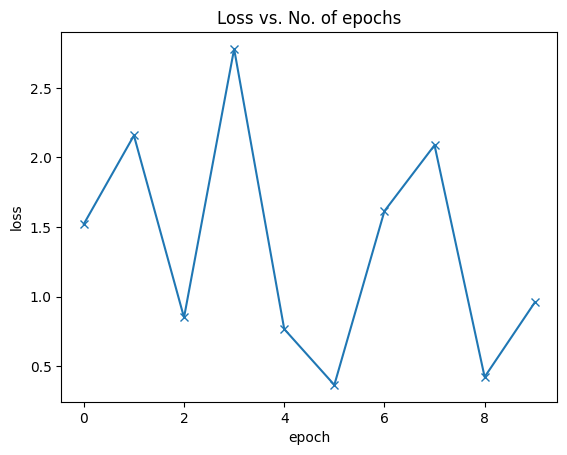

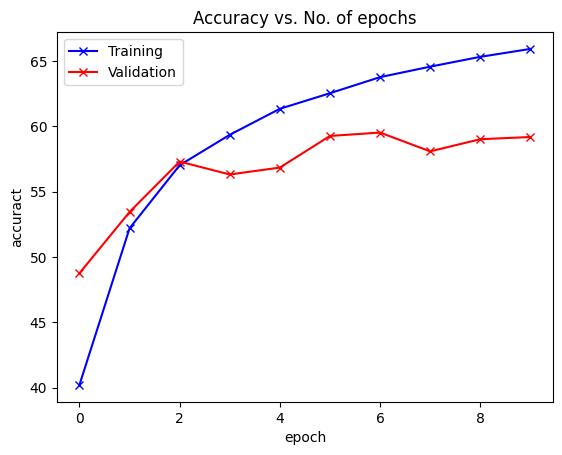

In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
num_epochs = 10
model = net
net_results = train_network(model, 
                            optimizer, 
                            criterion, 
                            trainloader, 
                            testloader, 
                            num_epochs
                            )

# plot the chart
plot_loss(net_results[0])
plot_acc(net_results[1], net_results[2])

# save the model info
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.01, momentum=0.9)
num_epochs = 5
model = resnet18
resnet18_results = train_network(model, 
                            optimizer, 
                            criterion, 
                            trainloader, 
                            testloader, 
                            num_epochs
                            )

# plot the chart
plot_loss(resnet18_results[0])
plot_acc(resnet18_results[1], resnet18_results[2])

# save the model info
PATH = './cifar_resnet18.pth'
torch.save(resnet18.state_dict(), PATH)

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(densenet121.parameters(), lr=0.001, momentum=0.9)
num_epochs = 10
model = densenet121
densenet121_results = train_network(model, 
                            optimizer, 
                            criterion, 
                            trainloader,  
                            testloader, 
                            num_epochs
                            )

# plot the chart
plot_loss(densenet121_results[0])
plot_acc(densenet121_results[1], densenet121_results[2])

# save the model info
PATH = './cifar_densenet121.pth'
torch.save(densenet121.state_dict(), PATH)

Epoch 1/10, Train Loss: 2.9159, Train Accuracy: 10.89, Test Accuracy: 11.38
Epoch 2/10, Train Loss: 2.2116, Train Accuracy: 11.16, Test Accuracy: 11.38
Epoch 3/10, Train Loss: 2.4054, Train Accuracy: 11.17, Test Accuracy: 11.38
Epoch 4/10, Train Loss: 2.5566, Train Accuracy: 11.09, Test Accuracy: 11.38
Epoch 5/10, Train Loss: 2.6850, Train Accuracy: 11.09, Test Accuracy: 11.38
Epoch 6/10, Train Loss: 2.1842, Train Accuracy: 11.22, Test Accuracy: 11.38
Epoch 7/10, Train Loss: 2.0682, Train Accuracy: 11.11, Test Accuracy: 11.38
Epoch 8/10, Train Loss: 2.2662, Train Accuracy: 10.88, Test Accuracy: 11.38
Epoch 9/10, Train Loss: 2.5953, Train Accuracy: 11.10, Test Accuracy: 11.38


KeyboardInterrupt: 

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(efficientnet_b0.parameters(), lr=0.001, momentum=0.9)
num_epochs = 10
model = efficientnet_b0
efficientnet_b0_results = train_network(model, 
                            optimizer, 
                            criterion, 
                            trainloader, 
                            testloader, 
                            num_epochs
                            )

# plot the chart
plot_loss(efficientnet_b0_results[0])
plot_acc(efficientnet_b0_results[1], efficientnet_b0_results[2])

# save the model info
PATH = './cifar_efficientnet_b0.pth'
torch.save(efficientnet_b0.state_dict(), PATH)

## Test the Model

### Testing data

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))

In [19]:
net = Net()
net.load_state_dict(torch.load('./cifar_net.pth'))

resnet18 = ResNet18()
resnet18.load_state_dict(torch.load('./cifar_resnet18.pth'))

densenet121 = DenseNet121()
densenet121.load_state_dict(torch.load('./cifar_densenet121.pth'))

efficientnet_b0 = EfficientNetB0()
efficientnet_b0.load_state_dict(torch.load('./cifar_efficientnet_b0.pth'))

<All keys matched successfully>

In [20]:
def test_set_acc(testloader, model):
    correct = 0
    total = 0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
       
    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
print('Model: net')
test_set_acc(testloader, net)

In [21]:
print('Model: resnet18')
test_set_acc(testloader, resnet18)

Model: resnet18
Accuracy of the network on the 10000 test images: 9 %
Accuracy of airplane :  2 %
Accuracy of automobile :  1 %
Accuracy of  bird :  6 %
Accuracy of   cat :  3 %
Accuracy of  deer :  5 %
Accuracy of   dog : 52 %
Accuracy of  frog : 10 %
Accuracy of horse :  2 %
Accuracy of  ship :  6 %
Accuracy of truck : 10 %


In [ ]:
print('Model: densenet121')
test_set_acc(testloader, densenet121)

In [ ]:
print('Model: efficientnet_b0')
test_set_acc(testloader, efficientnet_b0)